<a href="https://colab.research.google.com/github/stefantatur/ML_projects/blob/main/%D0%9A%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D0%BA%D0%B8_%D0%B8_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [ ]:
pip install -U numba

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df=pd.read_csv('new_table_after_corr.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,"Реальные денежные доходы населения, в процентах к предыдущему периоду 1)","Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации*, %","Коэффициент материнской смертности (3.1.1), на 100 тысяч родившихся живыми",Смертность детей в возрасте 0 - 4 года на 1000 родившихся живыми 1) 2),Младенческая смертность (на 1 тыс. родившихся живыми) (промилле) 1),Заболеваемость туберкулезом на 100 000 человек (3.3.2)1),"Смертность от туберкулеза1)2) , на 100 000 населения",Заболеваемость малярией на 1000 человек (3.3.3)1),Заболеваемость гепатитом B на 100 000 человек (3.3.4) 1),Заболеваемость с первые в жизни установленным диагнозом психического расстройства и расстройствами поведения на 100 тыс. населения 1),Заболеваемость с впервые в жизни установленным диагнозом наркомании на 100 тыс. населения1),Заболеваемость с впервые в жизни установленным диагнозом алкоголизма и алкогольного психоза на 100 тыс. населения 1),"Смертность от неумышленного отравления (3.9.3)1)2) , на 100 тыс. населения","Санитарное состояние почвы, число проб, не соответствующих гигиеническим нормативам по санитарно-химическим показателям в процентах от общего числа исследованных проб по санитарно-химическим показателям","Ожидаемая продолжительность жизни при рождении, лет 1)2)",Доля нормативно очищенной сточной воды (6.3.1),Потребление электроэнергии по субъектам Российской Федерации\n(млн.кВт.час),"Потребление электрической энергии на душу населения, кВт.ч 1)",Индекс физического объема валового регионального продукта на душу населения 1),"Грузооборот по видам транспорта, млрд. тонно-км","Пассажирооборот по видам транспорта общего пользования, млрд. пассажиро-км","Доля автомобильных дорог местного значения, соответствующих нормативным требованиям, %",Коэффициент Джини (индекс концентрации доходов) 1),"Доля оплаты труда наемных работников (заработная плата и фактические отчисления на социальное страхование) в валовом внутреннем продукте (10.4.1), %","Ассигновано средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Фактически освоено средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Площадь лесных земель, пройденная пожарами, га","Валовой региональный продукт на душу населения, рублей 1)"
0,0,2010,106.5,9.236597,21.5,9.6,7.6,70.6,26.1,0.000000,6.425235,243.3,10.7,71.8,3.2,1.46,69.70,12.666861,16708.1,3903.762594,106.6,4028.718800,4414064.4,50.2,0.397,43.0,963116.2,963116.2,1897.0,154127.9
1,1,2011,100.5,10.310649,15.1,9.8,7.6,65.4,23.8,0.000234,7.076025,214.7,17.6,63.6,3.3,1.42,69.70,14.037013,17320.5,4058.287700,107.1,4022.796200,4287625.6,53.4,0.392,44.6,988212.6,988212.6,2330.0,179470.3
2,2,2012,106.4,9.047841,16.0,10.8,9.1,59.6,20.8,0.001642,6.787817,204.4,12.8,56.2,2.8,2.71,71.02,13.082795,17582.0,4129.529400,102.7,4870.286800,4234356.2,53.0,0.398,46.7,846412.0,846412.0,108.0,198129.2
3,3,2013,108.1,9.430277,14.1,11.2,9.5,52.5,20.0,0.000470,6.846943,214.5,12.3,50.2,3.1,2.78,71.39,14.058066,17337.3,4079.295598,103.1,5859.029465,3666609.9,50.5,0.395,45.4,701144.3,701144.3,10.0,215923.2
4,4,2014,103.2,10.658345,7.8,9.8,7.9,46.5,17.5,0.000235,5.655301,202.1,11.3,45.6,2.6,2.47,71.30,5.630403,17942.4,4227.902972,103.3,6320.547800,3478790.2,52.7,0.396,41.6,1043274.1,1043274.1,324.0,237465.8


In [ ]:
del df['Unnamed: 0.1']

In [ ]:
df.head()

,Unnamed: 0,"Реальные денежные доходы населения, в процентах к предыдущему периоду 1)","Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации*, %","Коэффициент материнской смертности (3.1.1), на 100 тысяч родившихся живыми",Смертность детей в возрасте 0 - 4 года на 1000 родившихся живыми 1) 2),Младенческая смертность (на 1 тыс. родившихся живыми) (промилле) 1),Заболеваемость туберкулезом на 100 000 человек (3.3.2)1),"Смертность от туберкулеза1)2) , на 100 000 населения",Заболеваемость малярией на 1000 человек (3.3.3)1),Заболеваемость гепатитом B на 100 000 человек (3.3.4) 1),Заболеваемость с первые в жизни установленным диагнозом психического расстройства и расстройствами поведения на 100 тыс. населения 1),Заболеваемость с впервые в жизни установленным диагнозом наркомании на 100 тыс. населения1),Заболеваемость с впервые в жизни установленным диагнозом алкоголизма и алкогольного психоза на 100 тыс. населения 1),"Смертность от неумышленного отравления (3.9.3)1)2) , на 100 тыс. населения","Санитарное состояние почвы, число проб, не соответствующих гигиеническим нормативам по санитарно-химическим показателям в процентах от общего числа исследованных проб по санитарно-химическим показателям","Ожидаемая продолжительность жизни при рождении, лет 1)2)",Доля нормативно очищенной сточной воды (6.3.1),Потребление электроэнергии по субъектам Российской Федерации\n(млн.кВт.час),"Потребление электрической энергии на душу населения, кВт.ч 1)",Индекс физического объема валового регионального продукта на душу населения 1),"Грузооборот по видам транспорта, млрд. тонно-км","Пассажирооборот по видам транспорта общего пользования, млрд. пассажиро-км","Доля автомобильных дорог местного значения, соответствующих нормативным требованиям, %",Коэффициент Джини (индекс концентрации доходов) 1),"Доля оплаты труда наемных работников (заработная плата и фактические отчисления на социальное страхование) в валовом внутреннем продукте (10.4.1), %","Ассигновано средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Фактически освоено средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Площадь лесных земель, пройденная пожарами, га","Валовой региональный продукт на душу населения, рублей 1)"
0,2010,106.5,9.236597,21.5,9.6,7.6,70.6,26.1,0.000000,6.425235,243.3,10.7,71.8,3.2,1.46,69.70,12.666861,16708.1,3903.762594,106.6,4028.718800,4414064.4,50.2,0.397,43.0,963116.2,963116.2,1897.0,154127.9
1,2011,100.5,10.310649,15.1,9.8,7.6,65.4,23.8,0.000234,7.076025,214.7,17.6,63.6,3.3,1.42,69.70,14.037013,17320.5,4058.287700,107.1,4022.796200,4287625.6,53.4,0.392,44.6,988212.6,988212.6,2330.0,179470.3
2,2012,106.4,9.047841,16.0,10.8,9.1,59.6,20.8,0.001642,6.787817,204.4,12.8,56.2,2.8,2.71,71.02,13.082795,17582.0,4129.529400,102.7,4870.286800,4234356.2,53.0,0.398,46.7,846412.0,846412.0,108.0,198129.2
3,2013,108.1,9.430277,14.1,11.2,9.5,52.5,20.0,0.000470,6.846943,214.5,12.3,50.2,3.1,2.78,71.39,14.058066,17337.3,4079.295598,103.1,5859.029465,3666609.9,50.5,0.395,45.4,701144.3,701144.3,10.0,215923.2
4,2014,103.2,10.658345,7.8,9.8,7.9,46.5,17.5,0.000235,5.655301,202.1,11.3,45.6,2.6,2.47,71.30,5.630403,17942.4,4227.902972,103.3,6320.547800,3478790.2,52.7,0.396,41.6,1043274.1,1043274.1,324.0,237465.8


In [ ]:
pd.DataFrame(table, dtype=float)

sklearn.preproce

NameError: name 'table' is not defined

In [ ]:
data = pd.DataFrame(df['Валовой региональный продукт на душу населения, рублей 1)'],dtype=float)

In [ ]:
data.head()

,"Валовой региональный продукт на душу населения, рублей 1)"
0,154127.9
1,179470.3
2,198129.2
3,215923.2
4,237465.8


<AxesSubplot:>

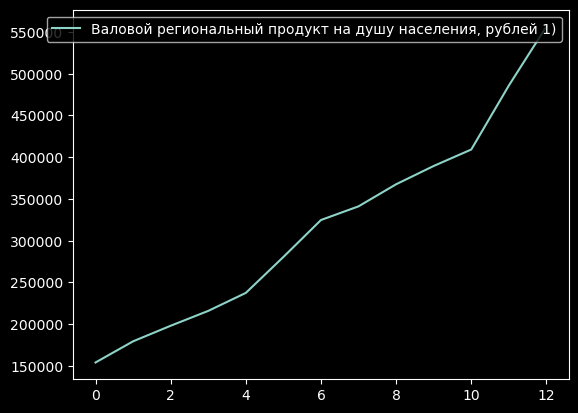

In [ ]:
data.plot()

Ряд не стационарный,в том смысле,что дисперсия не является константным значением. Можно видеть что на разных промежутках дисперсия разная. Необходимо подогнать модель **ARIMA** под наш не стационарный ряд путем разности некоторого порядка.

<AxesSubplot:>

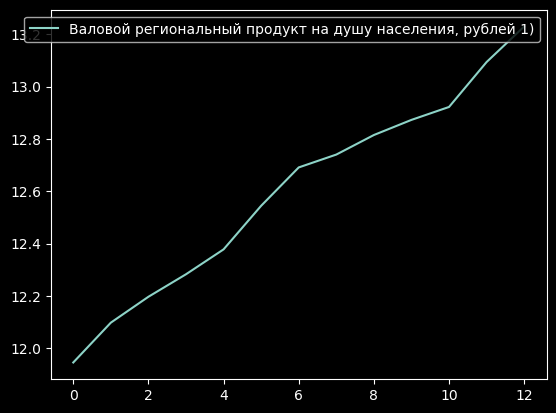

In [ ]:
data = np.log(data)

data.plot()

In [ ]:
msk = (data.index < len(data)-7)
data_train = data[msk].copy()
data_test = data[~msk].copy()

ARIMA(p,d,q)
ARMA
x2 - x1

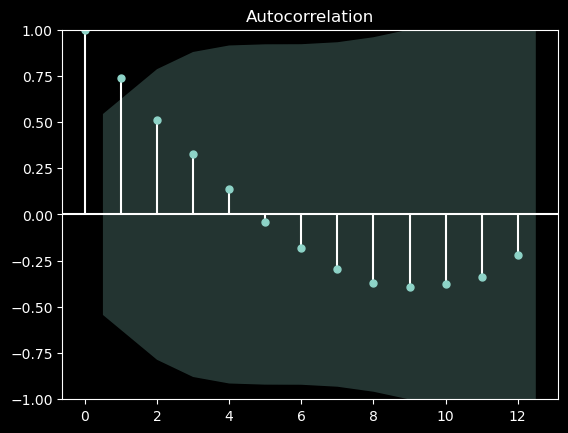

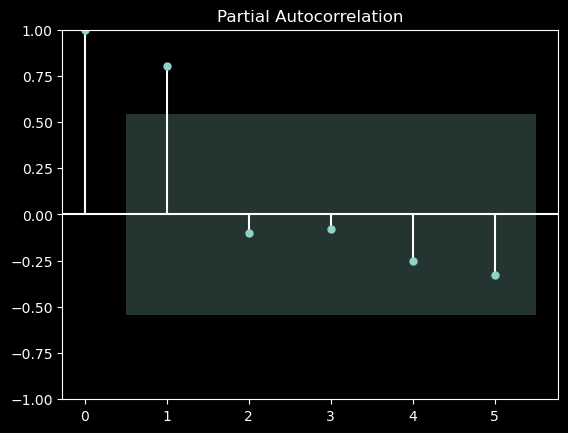

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



acf_original = plot_acf(data)

pacf_original = plot_pacf(data,lags=5)

Видим,что слева кореляция положительная,а справа отрицательная. Данный график помогает определить коэффициенты p и q для того,чтобы подогнать нашу модель.
Основные принципы выбора этих коэффициентов:
pacf - измеряет дисперсию баланса участка. Он говорит следует ли включать участок в модель авторегрессии **AR**
acf - измеряет корреляции с участками,помогает оценить скользящее среднее в моделях a.

*p - 2? потому что значительные всплески только первые два лага.
d - 1?*

Попробуем **ARIMA(2,1,0)**

Будем подгонять модель.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_train,order=(2,1,0))
model_fit = model.fit()

print(model_fit.summary())

                                                   SARIMAX Results                                                   
Dep. Variable:     Валовой региональный продукт на душу населения, рублей 1)   No. Observations:                    6
Model:                                                        ARIMA(2, 1, 0)   Log Likelihood                   7.216
Date:                                                       Tue, 30 Apr 2024   AIC                             -8.432
Time:                                                               03:13:03   BIC                             -9.603
Sample:                                                                    0   HQIC                           -11.576
                                                                         - 6                                         
Covariance Type:                                                         opg                                         
                 coef    std err          z      P>|z|  

Наша модель. Теперь проверим насколько она качественная.

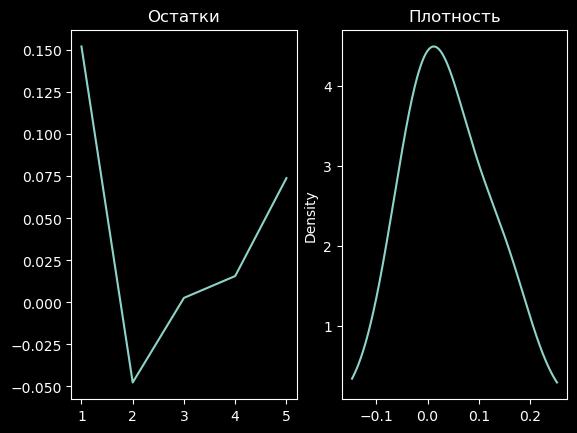

In [ ]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Остатки',ax=ax[0])
residuals.plot(title='Плотность',kind='kde',ax=ax[1])
plt.show()

Плотность около нуля,поэтому все хорошо. Посмотрим на плотность и остатки наших acf и pacf.


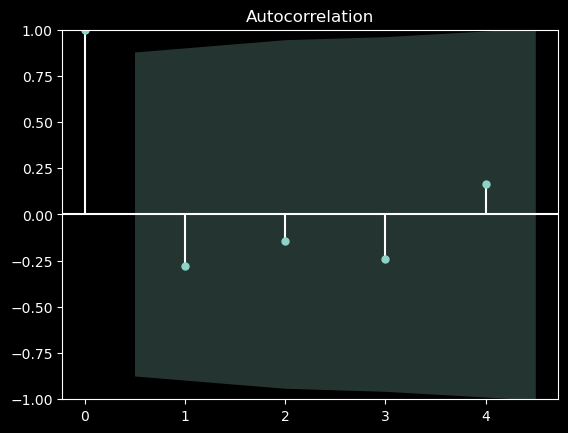

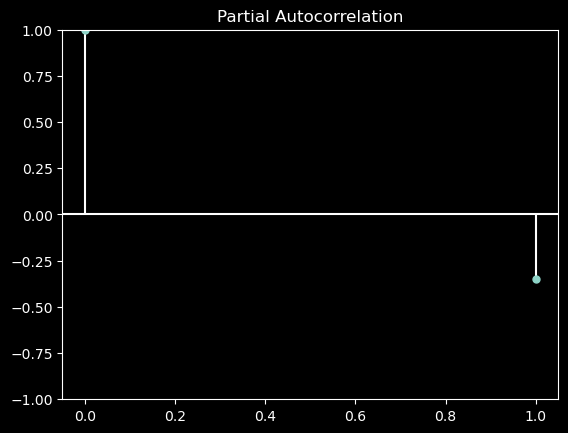

In [ ]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals,lags=1)

Расчитаем прогнозы.

<AxesSubplot:>

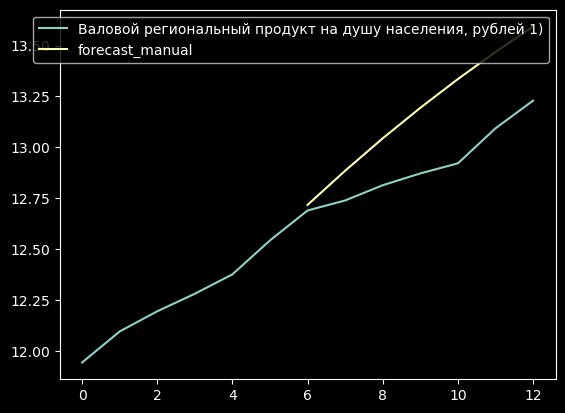

In [ ]:
forecast_test = model_fit.forecast(len(data_test))

data['forecast_manual'] = [None]*(len(data_train)) + list(forecast_test)

data.plot()


Предсказание не очень соответствует реальности.

In [ ]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(data_train,stepwise=False,seasonal=False)
auto_arima

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:               SARIMAX(1, 0, 2)   Log Likelihood                   1.957
Date:                Tue, 30 Apr 2024   AIC                              4.087
Time:                        03:13:21   BIC                              3.254
Sample:                             0   HQIC                             0.752
                                  - 6                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.007    145.575      0.000       0.986       1.013
ma.L1          1.1433      2.600      0.440      0.660      -3.952       6.239
ma.L2          0.7550      3.584      0.211      0.833      -6.269       7.779
sigma2         0.0039      0.015      0.264      0.792      -0.025       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.33   Prob(JB):                         0.76
Heteroskedasticity (H):               0.71   Skew:                            -0.68
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

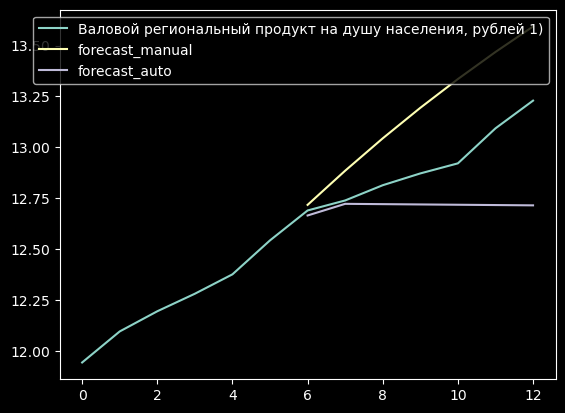

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(data_test))
data['forecast_auto'] = [None]*(len(data_train)) + list(forecast_test_auto)

data.plot()


1. Найти информацию по ковиду и по ввп. По кварталам
2. Оставить один плохой график
3. Построить плоский график по ценам доллара 2010 года с хорошим предсказанием (запасной план)
4. Попробовать интерполяцию.
5. Условия применимости ARCH,GARCH
6. Нормализовать данные


In [ ]:
px.scatter(df,x='Unnamed: 0',y='Валовой региональный продукт на душу населения, рублей 1)',color='Unnamed: 0',size='Unnamed: 0',template='plotly_dark',title='<b> Рост ВВП с каждым годов в Ростовской области')

In [ ]:
#px.scatter(df,x='Unnamed: 0',y='middle_list',color='Unnamed: 0',size='Unnamed: 0',template='plotly_dark',title='<b> Изменение продолжительности жизни с каждым годом')

Попробуем интерполяцию.

In [ ]:
import scipy. interpolate
y_interp = scipy. interpolate.interp1d (x, y)

for i in np.arange(2010,2022.5,0.5):
    middle_list = []
    if i < 2022:
        middle_list.append(y_interp(i))
    else:
        break
#find y-value associated with x-value of 13

df

,Unnamed: 0,"Реальные денежные доходы населения, в процентах к предыдущему периоду 1)","Доля расходов консолидированных бюджетов субъектов Российской Федерации на социальную поддержку отдельных категорий граждан к собственным доходам консолидированных бюджетов субъектов Российской Федерации*, %","Коэффициент материнской смертности (3.1.1), на 100 тысяч родившихся живыми",Смертность детей в возрасте 0 - 4 года на 1000 родившихся живыми 1) 2),Младенческая смертность (на 1 тыс. родившихся живыми) (промилле) 1),Заболеваемость туберкулезом на 100 000 человек (3.3.2)1),"Смертность от туберкулеза1)2) , на 100 000 населения",Заболеваемость малярией на 1000 человек (3.3.3)1),Заболеваемость гепатитом B на 100 000 человек (3.3.4) 1),Заболеваемость с первые в жизни установленным диагнозом психического расстройства и расстройствами поведения на 100 тыс. населения 1),Заболеваемость с впервые в жизни установленным диагнозом наркомании на 100 тыс. населения1),Заболеваемость с впервые в жизни установленным диагнозом алкоголизма и алкогольного психоза на 100 тыс. населения 1),"Смертность от неумышленного отравления (3.9.3)1)2) , на 100 тыс. населения","Санитарное состояние почвы, число проб, не соответствующих гигиеническим нормативам по санитарно-химическим показателям в процентах от общего числа исследованных проб по санитарно-химическим показателям","Ожидаемая продолжительность жизни при рождении, лет 1)2)",Доля нормативно очищенной сточной воды (6.3.1),Потребление электроэнергии по субъектам Российской Федерации\n(млн.кВт.час),"Потребление электрической энергии на душу населения, кВт.ч 1)",Индекс физического объема валового регионального продукта на душу населения 1),"Грузооборот по видам транспорта, млрд. тонно-км","Пассажирооборот по видам транспорта общего пользования, млрд. пассажиро-км","Доля автомобильных дорог местного значения, соответствующих нормативным требованиям, %",Коэффициент Джини (индекс концентрации доходов) 1),"Доля оплаты труда наемных работников (заработная плата и фактические отчисления на социальное страхование) в валовом внутреннем продукте (10.4.1), %","Ассигновано средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Фактически освоено средств на проведение работ по сохранению объектов культурного наследия, тысяч рублей","Площадь лесных земель, пройденная пожарами, га","Валовой региональный продукт на душу населения, рублей 1)"
0,2010,106.5,9.236597,21.5,9.6,7.6,70.6,26.1,0.000000,6.425235,243.3,10.7,71.8,3.200,1.46,69.70,12.666861,16708.1,3903.762594,106.6,4028.718800,4414064.400,50.200000,0.397,43.000000,963116.2,963116.2,1897.00,154127.9
1,2011,100.5,10.310649,15.1,9.8,7.6,65.4,23.8,0.000234,7.076025,214.7,17.6,63.6,3.300,1.42,69.70,14.037013,17320.5,4058.287700,107.1,4022.796200,4287625.600,53.400000,0.392,44.600000,988212.6,988212.6,2330.00,179470.3
2,2012,106.4,9.047841,16.0,10.8,9.1,59.6,20.8,0.001642,6.787817,204.4,12.8,56.2,2.800,2.71,71.02,13.082795,17582.0,4129.529400,102.7,4870.286800,4234356.200,53.000000,0.398,46.700000,846412.0,846412.0,108.00,198129.2
3,2013,108.1,9.430277,14.1,11.2,9.5,52.5,20.0,0.000470,6.846943,214.5,12.3,50.2,3.100,2.78,71.39,14.058066,17337.3,4079.295598,103.1,5859.029465,3666609.900,50.500000,0.395,45.400000,701144.3,701144.3,10.00,215923.2
4,2014,103.2,10.658345,7.8,9.8,7.9,46.5,17.5,0.000235,5.655301,202.1,11.3,45.6,2.600,2.47,71.30,5.630403,17942.4,4227.902972,103.3,6320.547800,3478790.200,52.700000,0.396,41.600000,1043274.1,1043274.1,324.00,237465.8
5,2015,97.7,10.828271,7.8,8.1,6.6,45.6,16.7,0.000940,5.405787,198.2,10.9,45.3,1.700,1.75,71.90,5.819059,18149.7,4281.559032,104.1,5922.613100,3554582.700,54.424555,0.387,38.200000,354653.2,354653.2,211.00,280522.0
6,2016,96.7,10.088173,8.2,7.8,6.6,39.8,15.9,0.000235,5.266633,192.9,9.2,37.0,2.100,1.82,72.20,5.807751,18717.5,4421.096739,103.3,5699.424000,3577013.300,55.293013,0.390,38.400000,282103.1,282103.1,1.30,324802.1
7,2017,100.6,11.442793,4.6,7.7,6.5,40.3,12.7,0.000000,5.577786,193.6,9.6,3

In [ ]:
y = list(df['Ожидаемая продолжительность жизни при рождении, лет 1)2)'])
x = list(df['Unnamed: 0'])

In [ ]:
y

[69.7,
 69.7,
 71.02,
 71.39,
 71.3,
 71.9,
 72.2,
 73.03,
 73.21,
 73.69,
 72.04,
 69.79,
 72.0]

In [ ]:
y_interp(2010.3)

array(69.7)

In [ ]:
a = [i for i in np.arange(2010,2022.5,0.5)]
for i in a:
    if i < 2022:
        middle_list.append(y_interp(i))
    else:
        break
list(middle_list)

[array(69.7),
 array(69.7),
 array(69.7),
 array(70.36),
 array(71.02),
 array(71.205),
 array(71.39),
 array(71.345),
 array(71.3),
 array(71.6),
 array(71.9),
 array(72.05),
 array(72.2),
 array(72.615),
 array(73.03),
 array(73.12),
 array(73.21),
 array(73.45),
 array(73.69),
 array(72.865),
 array(72.04),
 array(70.915),
 array(69.79),
 array(70.895)]

In [ ]:
a = [i for i in np.arange(2010,2022.5,0.5)]
years = []
for i in a:
    if i < 2022.5:
        years.append(i)
    else:
        break


In [ ]:
dfff

,years,middle_list
0,2010.0,69.700
1,2010.5,69.700
2,2011.0,69.700
3,2011.5,70.360
4,2012.0,71.020
5,2012.5,71.205
6,2013.0,71.390
7,2013.5,71.345
8,2014.0,71.300
9,2014.5,71.600


In [ ]:
px.scatter(dfff,x='years',y='middle_list',color='years',template='plotly_dark',title='<b> Рост ВВП с каждым годов в Ростовской области')

In [ ]:
dff = pd.DataFrame([years,middle_list],dtype=float)

In [ ]:
dfff = dff.T
dfff.columns = ['years', 'middle_list']
dfff

,years,middle_list
0,2010.0,69.700
1,2010.5,69.700
2,2011.0,69.700
3,2011.5,70.360
4,2012.0,71.020
5,2012.5,71.205
6,2013.0,71.390
7,2013.5,71.345
8,2014.0,71.300
9,2014.5,71.600


<AxesSubplot:>

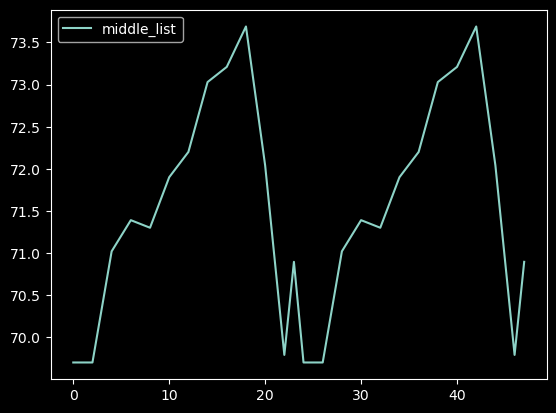

In [ ]:
di = pd.DataFrame(dfff['middle_list'],dtype=float)
di.plot()

In [ ]:
di

,middle_list
0,69.700
1,69.700
2,69.700
3,70.360
4,71.020
5,71.205
6,71.390
7,71.345
8,71.300
9,71.600


In [ ]:
di.pop('forecast_manual')

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8     70.646437
9     70.091511
10    69.877218
11    69.512048
12    69.654560
13    70.336390
14    70.750297
15    71.107268
16    71.546624
17    71.315825
18    70.724767
19    70.402764
20    69.874583
21    69.436144
22    69.735595
23    70.159220
24    70.484152
Name: forecast_manual, dtype: float64

In [ ]:
msk = (di.index < len(di)-17)
di_train = di[msk].copy()
di_test = di[~msk].copy()


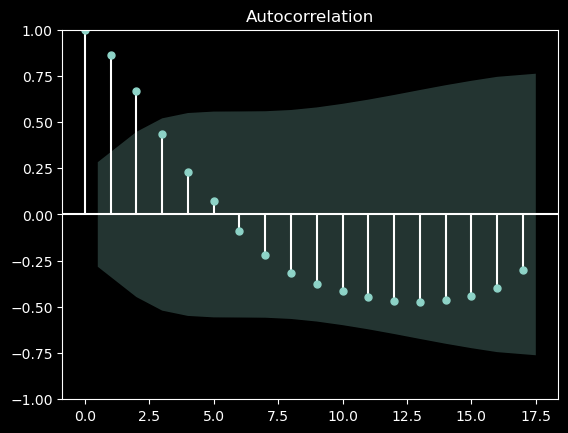

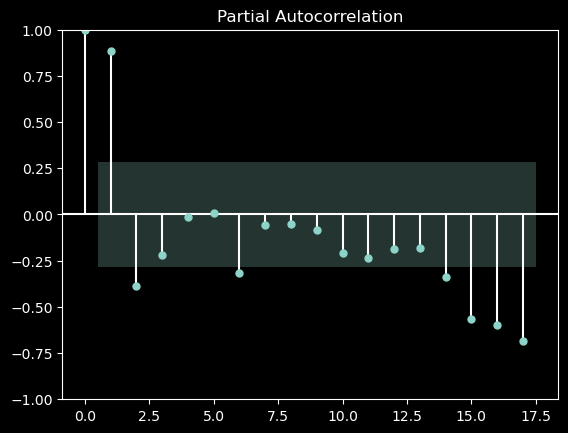

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



acf_original = plot_acf(di)

pacf_original = plot_pacf(di)

ARIMA(2,1,0)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(di_train,order=(18,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            middle_list   No. Observations:                   31
Model:                ARIMA(18, 1, 1)   Log Likelihood                 -10.767
Date:                Tue, 30 Apr 2024   AIC                             61.533
Time:                        03:19:44   BIC                             89.557
Sample:                             0   HQIC                            70.498
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1626      0.612     -0.266      0.790      -1.362       1.036
ar.L2         -0.0916      0.555     -0.165      0.869      -1.179       0.996
ar.L3         -0.2316      0.519     -0.446      0.6

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Остатки',ax=ax[0])
residuals.plot(title='Плотность',kind='kde',ax=ax[1])
plt.show()

NameError: name 'model_fit' is not defined

In [ ]:
forecast_di = model_fit.forecast(len(di_test))

di['forecast_manual'] = [None]*(len(di_train)) + list(forecast_di)

di.plot()

NameError: name 'model_fit' is not defined

In [ ]:
di

,middle_list,forecast_manual
0,69.700,NaN
1,69.700,NaN
2,69.700,NaN
3,70.360,NaN
4,71.020,NaN
5,71.205,NaN
6,71.390,NaN
7,71.345,NaN
8,71.300,NaN
9,71.600,NaN


In [ ]:
#dmlist(di['middle_list']) + [None]*12
dm = pd.DataFrame(list(di['middle_list']) + [None]*12,dtype=float)
dm.columns = ['middle_list']
dm

,middle_list
0,69.700
1,69.700
2,69.700
3,70.360
4,71.020
5,71.205
6,71.390
7,71.345
8,71.300
9,71.600


ARIMA(16,1,1)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

mae = mean_absolute_error(di_test,forecast_di)
mape = mean_absolute_percentage_error(di_test,forecast_di)
mse = mean_squared_error(di_test,forecast_di)

print(f'mae {mae}\nmape {mape}\nmse {mse}')

NameError: name 'di_test' is not defined

Попробуем новую модель arch.

In [ ]:
dfff

In [ ]:
from arch import arch_model

In [ ]:
from arch import arch_model

dfff['returns'] = 100*dfff['middle_list'].pct_change().dropna()

In [ ]:
model_garch_1_1 = arch_model(dfff.returns[1:],mean = 'Constant',vol = 'GARCH',p = 1,q = 1)
result_garch_1_1 = model_garch_1_1.fit()
result_garch_1_1.summary()

In [ ]:
#forecast_gi = model_garch_1_1.fit.forecast(len(di_test))

model_garch_1_1.fit().plot()

In [ ]:
#di.pop('forecast_manual')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(di,order=(18,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            middle_list   No. Observations:                   48
Model:                ARIMA(18, 1, 1)   Log Likelihood                 -19.542
Date:                Tue, 30 Apr 2024   AIC                             79.084
Time:                        03:35:13   BIC                            116.087
Sample:                             0   HQIC                            93.008
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1538      0.499      0.308      0.758      -0.825       1.133
ar.L2         -0.0316      0.318     -0.099      0.921      -0.655       0.592
ar.L3         -0.1581      0.494     -0.320      0.7

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



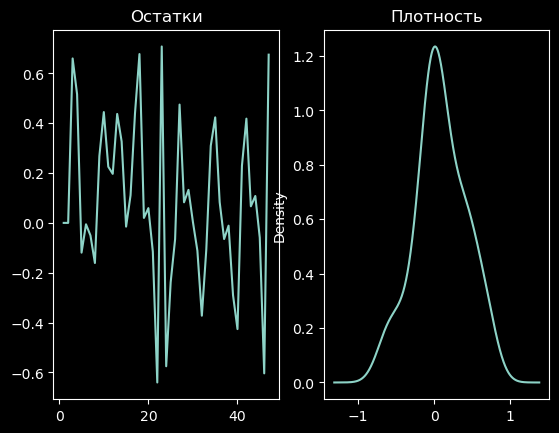

In [ ]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Остатки',ax=ax[0])
residuals.plot(title='Плотность',kind='kde',ax=ax[1])
plt.show()

In [ ]:
#di['middle_list'] = list(di['middle_list']) + [None]*20

In [ ]:
forecast_di

60    72.125747
61    72.834828
62    73.260612
63    73.385814
64    73.349905
65    73.058022
66    73.193137
67    72.907675
68    72.241188
69    71.338028
70    70.421001
71    70.113203
Name: predicted_mean, dtype: float64

In [ ]:
forecast_dm = model_fit.forecast(12)
a = [70.895]
dm['middle_list'] = list(dm['middle_list'])
dm['forecast_manual'] = [None]*47 + a +  list(forecast_dm)

dm

,middle_list,forecast_manual
0,69.700,NaN
1,69.700,NaN
2,69.700,NaN
3,70.360,NaN
4,71.020,NaN
5,71.205,NaN
6,71.390,NaN
7,71.345,NaN
8,71.300,NaN
9,71.600,NaN


<AxesSubplot:>

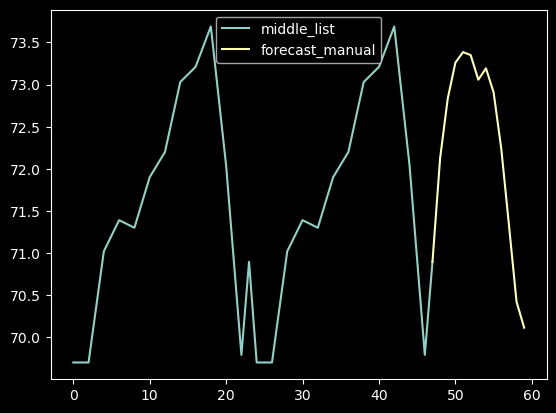

In [ ]:
dm.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

#mae = mean_absolute_error(dm,forecast_dm)
#mape = mean_absolute_percentage_error(dm,forecast_dm)
#mse = mean_squared_error(dm,forecast_dm)

#print(f'mae {mae}\nmape {mape}\nmse {mse}')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dm,order=(18,1,1))
model_fit = model.fit()

print(model_fit.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:            middle_list   No. Observations:                   60
Model:                ARIMA(18, 1, 1)   Log Likelihood                 -19.558
Date:                Tue, 30 Apr 2024   AIC                             79.115
Time:                        12:17:36   BIC                            120.666
Sample:                             0   HQIC                            95.335
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1598      0.546      0.293      0.770      -0.910       1.230
ar.L2         -0.0239      0.361     -0.066      0.947      -0.731       0.683
ar.L3         -0.1675      0.607     -0.276      0.7

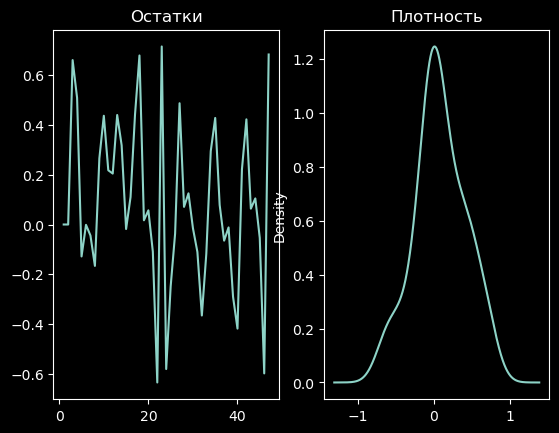

In [ ]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
residuals.plot(title='Остатки',ax=ax[0])
residuals.plot(title='Плотность',kind='kde',ax=ax[1])
plt.show()

In [ ]:
forecast_di = model_fit.forecast(12)

di['middle_list'] = list(di['middle_list'])
di['forecast_manual'] = [None]*47 + list(forecast_di)

forecast_di

ValueError: Length of values (59) does not match length of index (48)

In [ ]:
df.interpolate()

In [ ]:
round(df,1)

In [ ]:
df.isnull().sum()

In [ ]:
df.fillna(0)

In [ ]:
df.corr().head()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='mako')
plt.show()

In [ ]:
fig=px.histogram(df,x='Доля граждан, ведущих здоровый образ жизни',y='Доля расходов на здравоохранение')
fig.show()

In [ ]:
fig=px.line(df.sort_values(by='Год'),x='Год',y='Доля расходов на здравоохранение',animation_frame='Регион',animation_group='Год',color='Регион',markers=True,template='plotly_dark',title='<b> Изменение доли расходов на здравоохранение в регионах')
fig.show()

In [ ]:
fig=px.line(df.sort_values(by='Доля расходов на здравоохранение'),x='Доля расходов на здравоохранение',y='Доля граждан, ведущих здоровый образ жизни',animation_frame='Регион',animation_group='Доля расходов на здравоохранение',color='Регион',markers=True,template='plotly_dark',title='<b> Изменение доли расходов на здравоохранение в регионах')
fig.show()

In [ ]:
px.scatter(df.sort_values(by='Год'),y='ВИЧ-инфекции на 100 000 человек населения',x='Ожидаемая продолжительность здоровой жизни',animation_frame='Год',animation_group='Регион',template='plotly_dark',color='Регион',size='Ожидаемая продолжительность здоровой жизни',opacity=0.6,title='<b> Продолжительность жизни и ВИЧ-инфекции')

In [ ]:
fig=px.line(df.sort_values(by='Доля расходов на здравоохранение'),x='Доля расходов на здравоохранение',y='Доля граждан, ведущих здоровый образ жизни',color='Регион',markers=True,template='plotly_dark',title='<b> Изменение доли расходов на здравоохранение в регионах')
fig.show()